<a href="https://colab.research.google.com/github/himanshunaidu/rnn_stock/blob/main/RNN_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dropout, Flatten, GlobalMaxPool2D, LeakyReLU, BatchNormalization, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/Colab\ Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv('ADANIPORTS.csv')

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [ ]:
close = df['Close'].values
# print(close.max())
# print(close[(close>300) & (close<400)].shape)
rounded = np.around(close, decimals=-1)
unique, counts = np.unique(rounded, return_counts=True)
unq_cnts = np.asarray((unique, counts)).T
# print(unq_cnts[unq_cnts[:, 1]>100, :])

1307.45


In [ ]:
series = df['Close'].values.reshape(-1, 1)
print(type(series), series.shape)

<class 'numpy.ndarray'> (3322, 1)


In [ ]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
print(scaler.mean_, scaler.var_)

[339.59641782] [65893.01566598]


In [ ]:
series = scaler.transform(series).flatten(order='A')

In [ ]:
print(series.shape)

(3322,)


In [ ]:
T = 10 #length of input (Previous T values)
D = 1 #no of features
X = np.zeros(shape=(series.shape[0]-T, T))
Y = np.zeros(shape=(series.shape[0]-T))

for i in range(series.shape[0]-T):
  # x = series[i: i+T]
  # print(x.shape)
  X[i] = series[i: i+T]
  Y[i] = series[i+T]

X = X.reshape(-1, T, D) #Shape of input to RNN should be NXTXD (by convention)
N = X.shape[0]
print(N)

3312


In [ ]:
print(N//2)

1656


In [ ]:
#LSTM for stock-prediction
def createNetwork():
  input = Input(shape=(T, D))
  x = LSTM(5, activation=LeakyReLU(alpha=0.3))(input)
  x = Dense(1)(x)
  model = Model(input, x)
  return model

In [ ]:
print(X[:N//2].shape)

(1656, 10, 1)


In [ ]:
model = createNetwork()
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))
r = model.fit(X[:N//2], Y[:N//2], validation_data=(X[N//2:], Y[N//2:]), epochs=100) 

Epoch 1/100
52/52 [==============================] - 2s 10ms/step - loss: 0.5173 - val_loss: 0.0950
Epoch 2/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0254 - val_loss: 0.0107
Epoch 3/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0123 - val_loss: 0.0018
Epoch 4/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0101 - val_loss: 0.0017
Epoch 5/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: 0.0029
Epoch 6/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.0012
Epoch 7/100
52/52 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0012
Epoch 8/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.0017
Epoch 9/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0087 - val_loss: 0.0014
Epoch 10/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0016
Epoch 11

[0.5173277258872986, 0.02539660781621933, 0.012263040989637375, 0.010111807845532894, 0.009847024455666542, 0.009054184891283512, 0.008105522021651268, 0.00861685536801815, 0.00866195559501648, 0.0078055476769804955, 0.00857985857874155, 0.008672253228724003, 0.008701896294951439, 0.0077861035242676735, 0.008188996464014053, 0.008877414278686047, 0.008344004862010479, 0.009003723971545696, 0.007588904816657305, 0.008808687329292297, 0.008911972865462303, 0.008215763606131077, 0.008875276893377304, 0.00855098944157362, 0.008775007911026478, 0.007802629377692938, 0.009021112695336342, 0.00802881084382534, 0.008916705846786499, 0.008028303273022175, 0.009697159752249718, 0.007724965922534466, 0.01030523981899023, 0.009618991985917091, 0.008766984567046165, 0.008795969188213348, 0.011342067271471024, 0.007915806025266647, 0.008265565149486065, 0.008413081988692284, 0.008685553446412086, 0.008954870514571667, 0.010477195493876934, 0.008415445685386658, 0.008544349111616611, 0.00803943257778

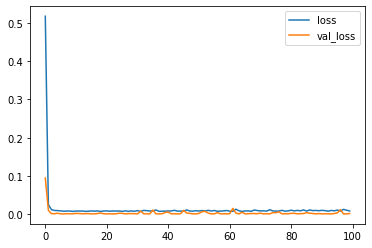

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
print(r.history['loss'], r.history['val_loss'])

plt.show()

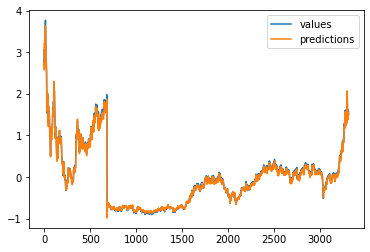

In [ ]:
#One-step forecast (Not so useful)
outputs = model.predict(X)
pred = outputs[:, 0]

plt.plot(Y, label='values')
plt.plot(pred, label='predictions')
plt.legend()

plt.show()

In [ ]:
#Multi-step forecast (Actually important)
target = Y[N//2:]
predictions = np.zeros(target.shape[0])

last_x = X[-N//2]

for i in range(target.shape[0]):
  p = model.predict(last_x.reshape(1, T, D))[0, 0]
  # print(p.shape)
  predictions[i] = p
  if i%100==0:
    print(i)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


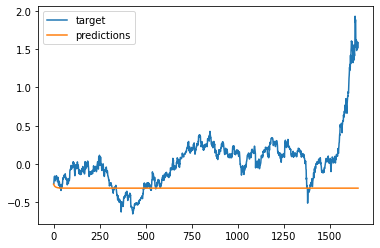

In [ ]:
plt.plot(target, label='target')
plt.plot(predictions, label='predictions')
plt.legend()

plt.show()

In [ ]:
#Multi-step forecast upto 1 values
before = 10
target = Y[N//2-before:N//2+1]
# print(target.shape)
predictions = np.zeros(target.shape[0])
# predictions[:10] = target[:10]

last_x = X[-N//2]

for i in range(before, target.shape[0]):
  p = model.predict(last_x.reshape(1, T, D))[0, 0]
  print(last_x[-1], target[-2])
  print(p, target[-1])
  predictions[i] = p

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

[-0.25398265] -0.253982645397769
-0.26569325 -0.26177395215626875


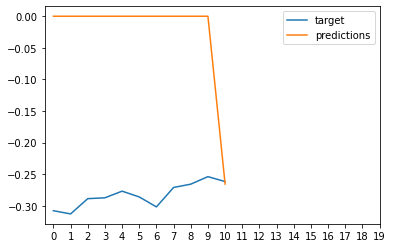

In [ ]:
plt.plot(target, label='target')
plt.plot(predictions, label='predictions')
plt.legend()
plt.xticks(np.arange(0, 20, 1))
plt.show()